<a href="https://colab.research.google.com/github/Dcodinginsane/Data-Analysis-project/blob/main/performance_Evaluting_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Techniques for Evaluating Machine Learning Models in Time Series Analysis

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

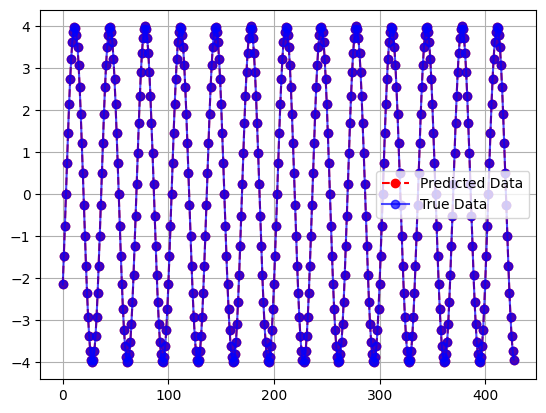

In [2]:
def data_preprocessing(dat , num_lags, train_test_split):
  # prepare the data for training
  x =[]
  y=[]
  for i in range(len(data)-num_lags):
    x.append(data[i:i+num_lags])
    y.append(data[i+num_lags])
  # Covert the data to numpy arrays
  x = np.array(x)
  y=np.array(y)

  # split the data inot training and testing sets
  split_index = int(train_test_split * len(x))
  x_train = x[:split_index]
  y_train = y[:split_index]
  x_test = x[split_index:]
  y_test = y[split_index:]

  return x_train, y_train, x_test, y_test
# Parameters
amplitude = 4.0
frequency = 3.0
duration = 15.25
sampling_frequency = 100

# Generate time values
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)

# Generate the sine wave
data = amplitude * np.sin(2 * np.pi * frequency * t)

'''
plt.plot(data[-250:], label = 'Sine Wave', linewidth = 1)
plt.grid()
plt.legend()
plt.axhline(y = 0, color = 'black', linewidth = 1)

'''

x_train, y_train, x_test, y_test = data_preprocessing(data, 100, 0.70)

# Create the model
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)

# Predict on the same data used for training
y_pred = model.predict(x_test)

# Plotting
plt.plot(y_pred, label='Predicted Data', linestyle='--', marker = 'o', color = 'red')
plt.plot(y_test, label='True Data', marker = 'o', alpha = 0.7, color = 'blue')
plt.legend()
plt.grid()

# Symmetric Mean Absolute Percentage Error

In [3]:
def calculate_smape(actual, predicted):
    n = len(actual)
    smape_sum = 0

    for i in range(n):
        numerator = 2 * np.abs(actual[i] - predicted[i])
        denominator = np.abs(actual[i]) + np.abs(predicted[i])

        smape_sum += numerator / denominator

    smape = (1 / n) * smape_sum * 100
    return smape

smape_value = calculate_smape(y_test, y_pred)
print(f"sMAPE: {smape_value:.2f}%")

sMAPE: 1.44%


# The Windowed Mean Absolute Error

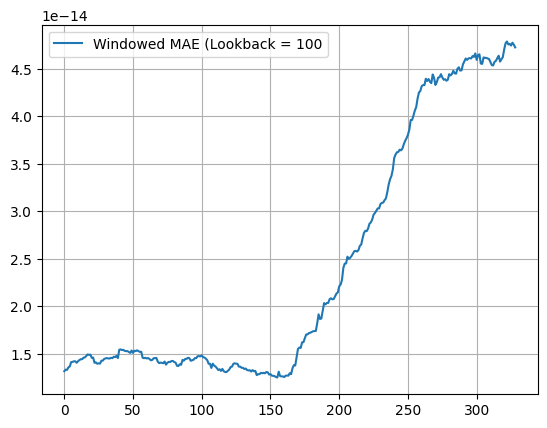

In [4]:
def windowed_mae(actual, predicted, window_size):

    n = len(actual)
    mae_values = []

    for i in range(n - window_size + 1):
        window_actual = actual[i : i + window_size]
        window_predicted = predicted[i : i + window_size]
        mae = np.mean(np.abs(window_actual - window_predicted))
        mae_values.append(mae)

    return np.array(mae_values)


mae_values = windowed_mae(y_test, y_pred, 100)
plt.plot(mae_values, label = 'Windowed MAE (Lookback = 100')
plt.grid()
plt.legend()

# Rolling Winning Streak
A rolling winning streak may be interesting to show you the number of consecutive periods that the algorithm is able to correctly predict. Here’s how it works:

An array is created to hold the values of the winning streak.
A value of 1 is added to the previous value in the array if the predicted value matches the sign of the actual value.
A value of 0 is inputted if the sign does not match. The counter therefore resumes from 0 and starts counting again.

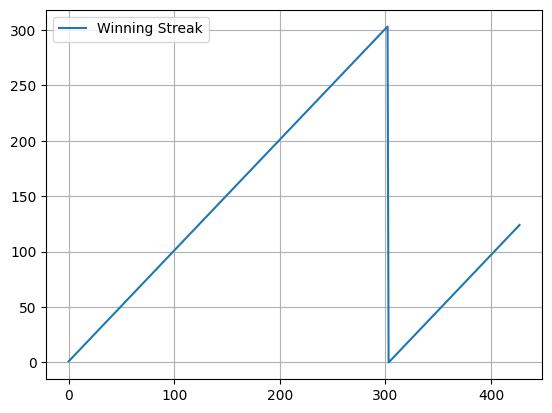

In [5]:
def winning_streak(actual, predicted):

    counts = []
    count = 0

    for i in range(len(actual)):

        if (actual[i] > 0 and predicted[i] > 0) or (actual[i] < 0 and predicted[i] < 0):
            count += 1
            counts.append(count)

        else:
            count = 0
            counts.append(count)

    counts = np.array(counts)

    return counts

streak = winning_streak(y_test, y_pred)
plt.plot(streak, label = 'Winning Streak')
plt.legend()
plt.grid()

In [6]:
np.mean(streak)

125.71495327102804

In [7]:

def model_bias(predicted_returns):
    up_predictions = np.sum(predicted_returns > 0)
    down_predictions = np.sum(predicted_returns < 0)

    return up_predictions / down_predictions

model_bias(y_pred)

1.0188679245283019